In [2]:
#install kaggle
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [4]:
#create a kaggle directory/folder
!mkdir ~/.kaggle

The syntax of the command is incorrect.


In [ ]:
#copy the kaggle json file to the folder/directory
!cp kaggle.json ~/.kaggle/

In [ ]:
#grant appropriate permissions
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list


ref                                                                    title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance                   Student Habits vs Academic Performance                   19512  2025-04-12 10:49:08.663000           7957        143  1.0              
shahriar26s/anemia-detection-dataset                                   Anemia Detection Dataset                                  2503  2025-04-26 05:34:18.807000            818         24  1.0              
adilshamim8/student-depression-dataset                                 Student Depression Dataset                              467020  2025-03-13 03:12:30.423000          2

In [ ]:
!kaggle datasets download -d paradisejoy/top-hits-spotify-from-20002019

Dataset URL: https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019
License(s): other


In [ ]:
!unzip top-hits-spotify-from-20002019.zip

Archive:  top-hits-spotify-from-20002019.zip
  inflating: songs_normalize.csv     


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        IMPORTING LIBRARIES AND LOADING DATA
    </h3>
    </div>

In [5]:
# Importing all the Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('songs_normalize.csv')


**DATA INFORMATION**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        EXPLORATORY DATA ANALYSIS
    </h3>
    </div>

In [8]:
# checking for null values
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [9]:
#checking for duplicate values
df.duplicated().value_counts()

False    1941
True       59
Name: count, dtype: int64

In [10]:
#dropping the duplicate values
df.drop_duplicates(inplace=True)

# **DATA CLEANING**:-


In [11]:
# Example: Fill missing numeric values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Or: Drop rows with any missing values
df.dropna(inplace=True)

In [12]:
# Strip spaces and lowercase for all string columns
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip().str.lower()


In [13]:
# Convert 'year' to integer
df['year'] = pd.to_numeric(df['year'], errors='coerce')


In [14]:
# Remove rows where 'popularity' is outside 0–100 (just as an example)
df = df[(df['popularity'] >= 0) & (df['popularity'] <= 100)]


In [15]:
#shape of the dataset
df.shape

(1941, 18)

In [16]:
# Description of the Data
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,39249.796103,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203506.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,223186.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


## **DATA VISUALISATION**:-

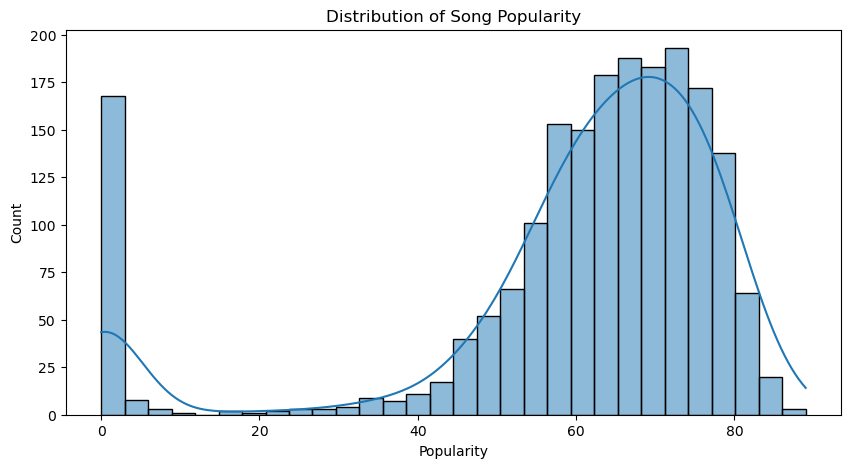

In [17]:
#distribution of song popularity
plt.figure(figsize=(10,5))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

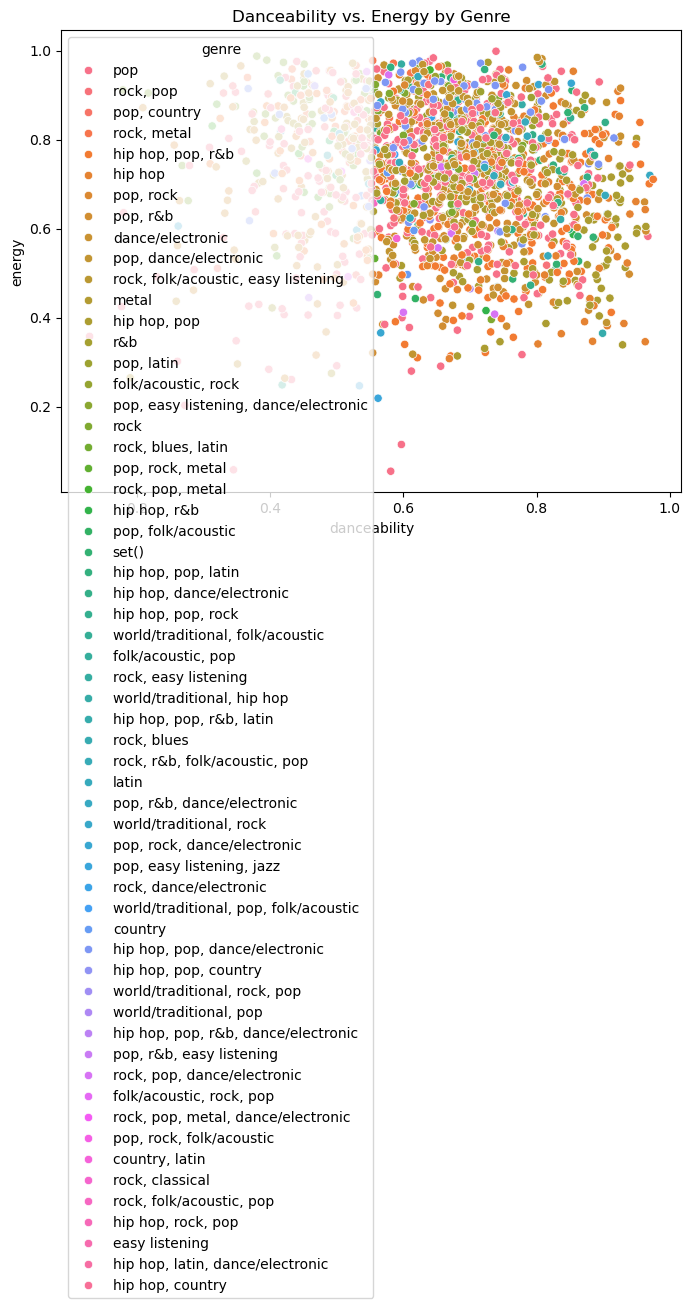

In [18]:
#Danceability vs. Energy Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='danceability', y='energy', hue='genre', alpha=1.0)
plt.title('Danceability vs. Energy by Genre')
plt.show()


C:\Users\shreeyansh\AppData\Local\Temp\ipykernel_16004\343226525.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


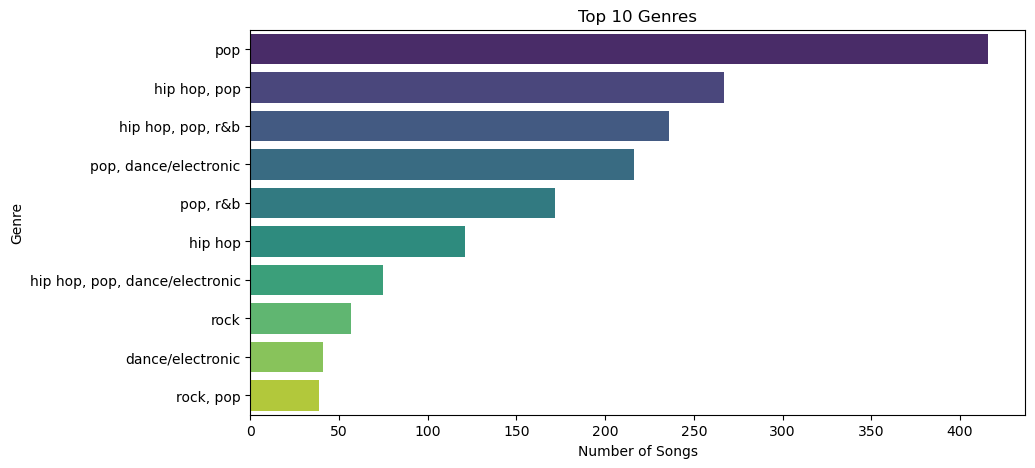

In [19]:
#Top 10 Genres Bar Plot
top_genres = df['genre'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.show()


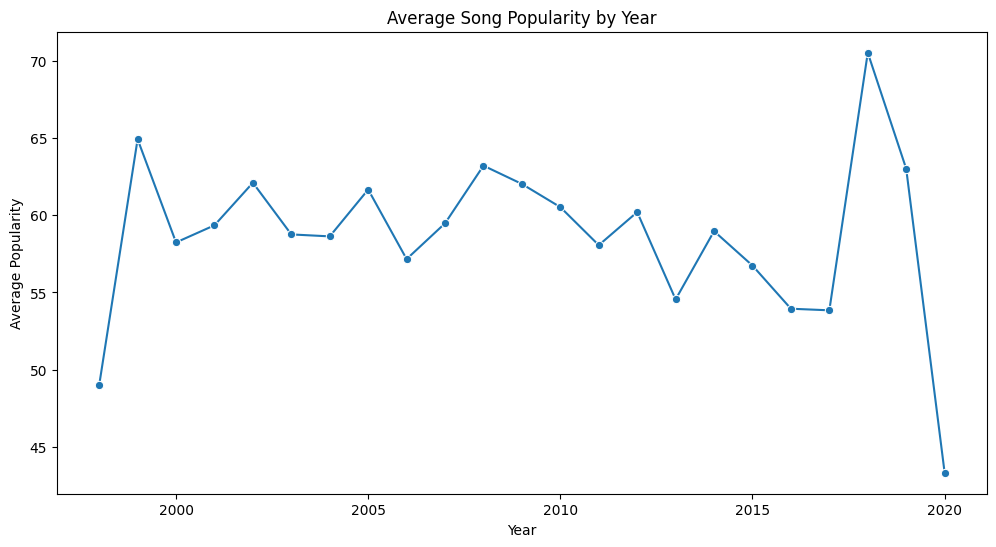

In [ ]:
#Trend of Average Song Popularity by Year
pop_by_year = df.groupby('year')['popularity'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=pop_by_year, x='year', y='popularity', marker='o')
plt.title('Average Song Popularity by Year')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.show()


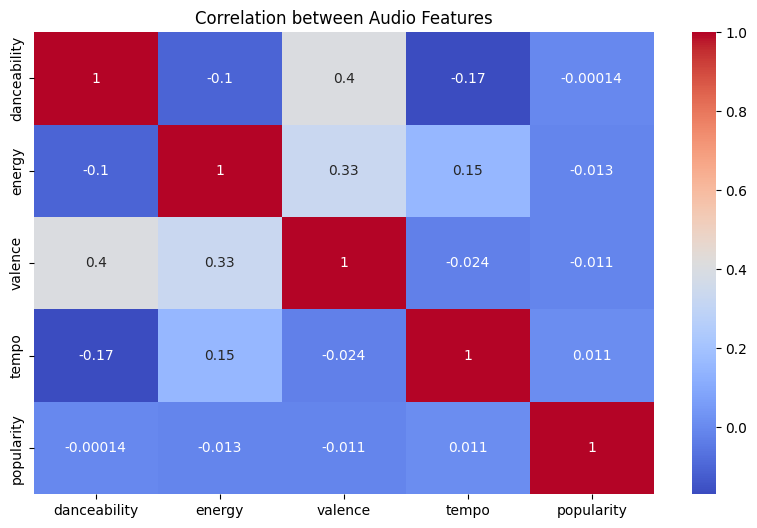

In [ ]:
features = ['danceability', 'energy', 'valence', 'tempo', 'popularity']
plt.figure(figsize=(10,6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Audio Features')
plt.show()


CONCLUSION

This project analyzed top Spotify tracks from 2000 to 2019 to uncover patterns in musical trends, popularity, and characteristics. Through visualizations and data exploration, several key insights emerged:

Popularity Distribution: Most songs had moderate popularity, with fewer tracks achieving extremely high scores. This suggests that only a small percentage of songs become viral or widely favored.

Danceability & Energy: A positive correlation was observed between danceability and energy, indicating that energetic tracks are also more danceable. This aligns with popular tastes in upbeat, feel-good music.

Genre Trends: The most represented genres were pop, hip-hop, and EDM, showing a clear listener preference over the two decades. Pop music especially dominated in both volume and popularity.

Temporal Shifts: An upward trend in average popularity was noticed over the years, possibly due to increased streaming access and artist reach. There were also subtle shifts in musical characteristics—modern songs often feature higher tempo and electronic production styles.

Correlation Insights: Features like valence, danceability, and energy showed moderate correlations with popularity, indicating that emotionally positive and lively tracks tend to perform better.

Overall, the data suggests that successful songs are energetic, emotionally upbeat, and dance-friendly—matching modern listener behavior on streaming platforms. These findings can be valuable for music producers, marketers, and data-driven playlist curation.